In [217]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from mpl_finance import candlestick_ohlc
from matplotlib.dates import MONDAY, DateFormatter, DayLocator, WeekdayLocator


%matplotlib inline


In [218]:
import pandas_datareader.data as web
import datetime
start = datetime.datetime(2018,1,1)
end = datetime.datetime(2019,1,23)
stocks = 'KO PEP'
stocks = stocks.split()
data = web.DataReader(stocks, 'yahoo', start, end )

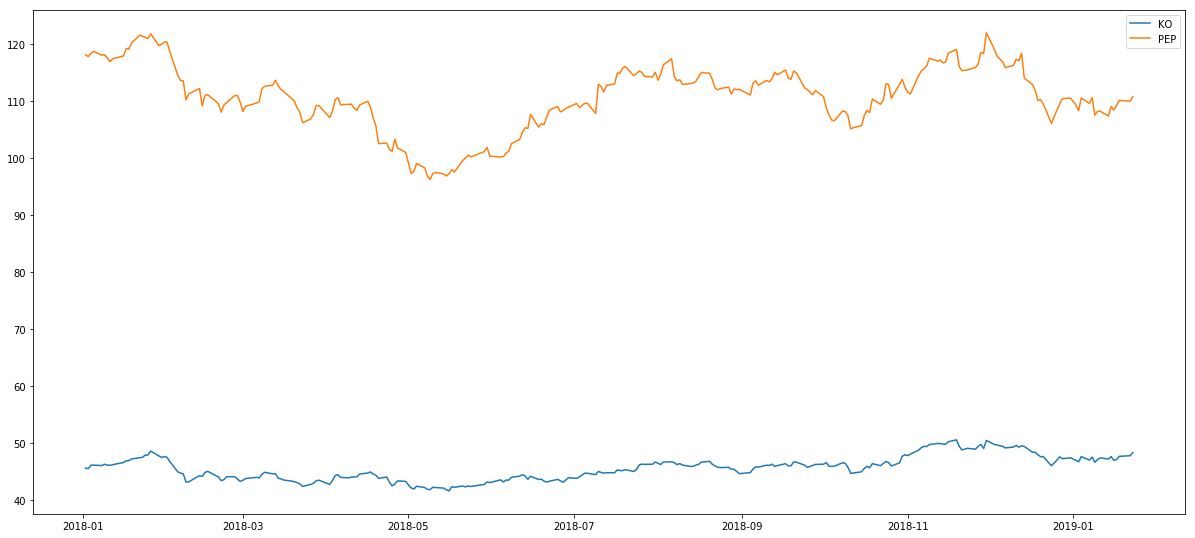

In [219]:
fig = plt.figure(figsize=(16,7))
ax = fig.add_axes([0,0,1,1])

for stock in stocks:
    ax.plot(data['Close', stock], label =stock)

ax.legend(loc = 0 )

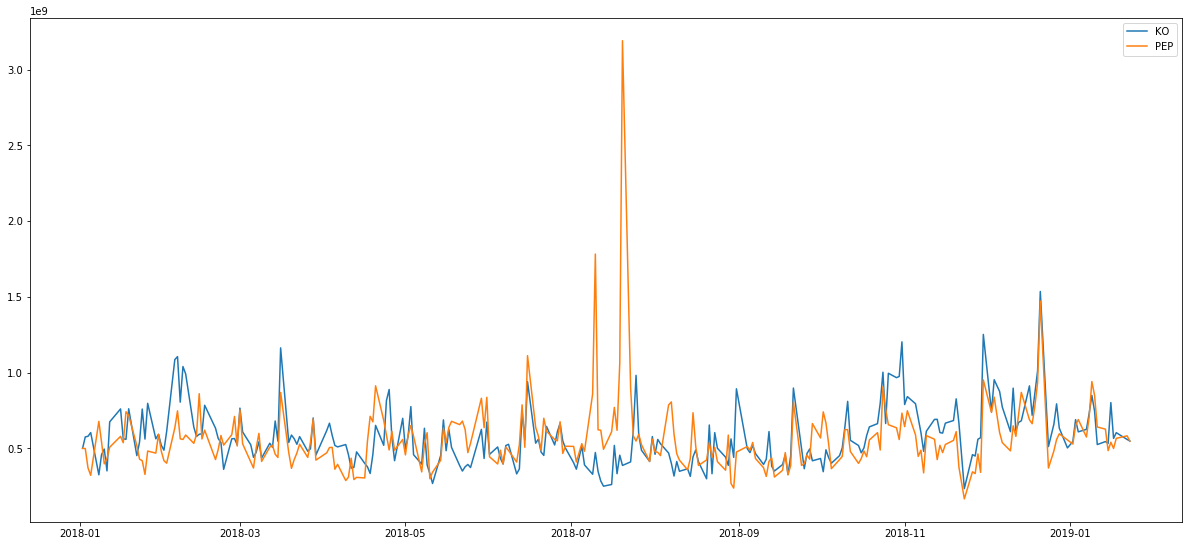

In [220]:
## transactions volume

volumesDF = pd.DataFrame()
fig = plt.figure(figsize=(16,7))
ax = fig.add_axes([0,0,1,1])

for stock in stocks:
    volumesDF[stock] = data['Open',stock] * data['Volume', stock]

for stock in stocks:
    ax.plot(volumesDF[stock], label =stock)

ax.legend(loc = 0 )

## Daily Returns & Volatility


In [221]:
dailyReturnsDF = pd.DataFrame()


for stock in stocks:
    dailyReturnsDF[stock] = data['Close',stock].pct_change(1) 


# dailyReturnsDF['ERAA'] = data['Close','ERAA.JK'].pct_change(1) 




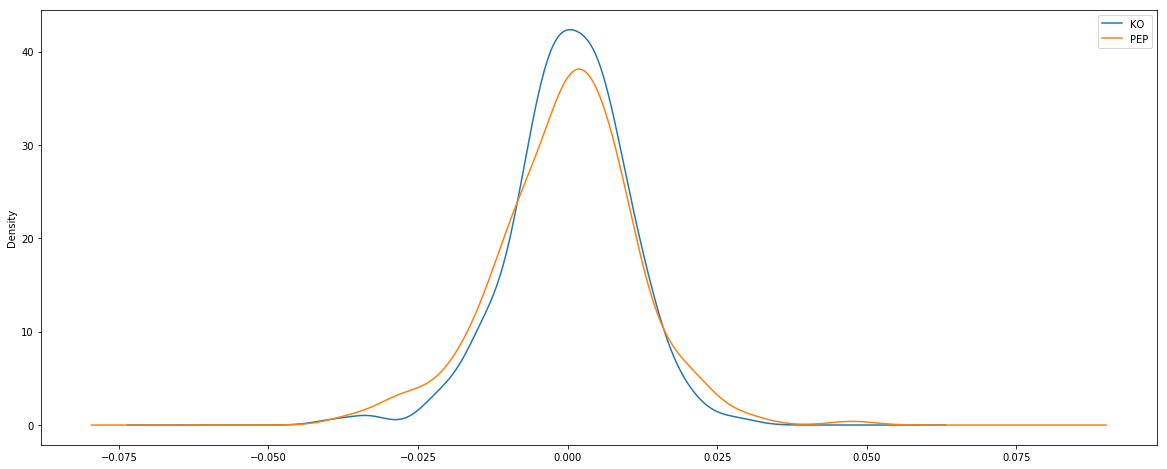

In [222]:
for stock in stocks:
    dailyReturnsDF[stock].plot(kind='kde' , figsize = (20,8), label =stock)

# dailyReturnsDF['ERAA'].plot(kind='kde' , figsize = (20,8), label ='ERAA')


plt.legend()

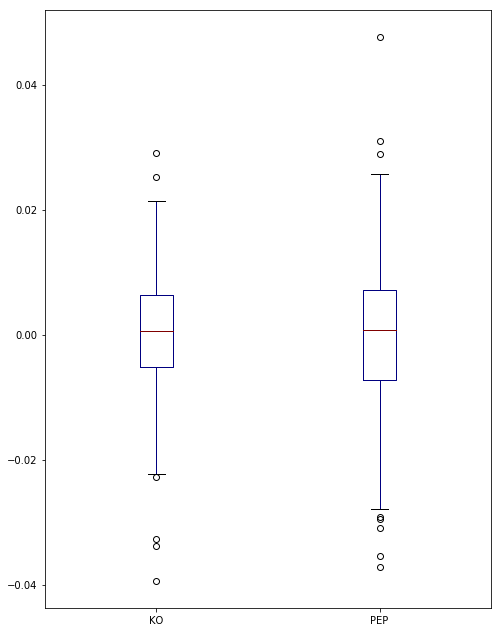

In [223]:
##BOX CHARTS
dailyReturnsDF.plot(kind='box',figsize=(8,11),colormap='jet')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f846677d128>,
      dtype=object)

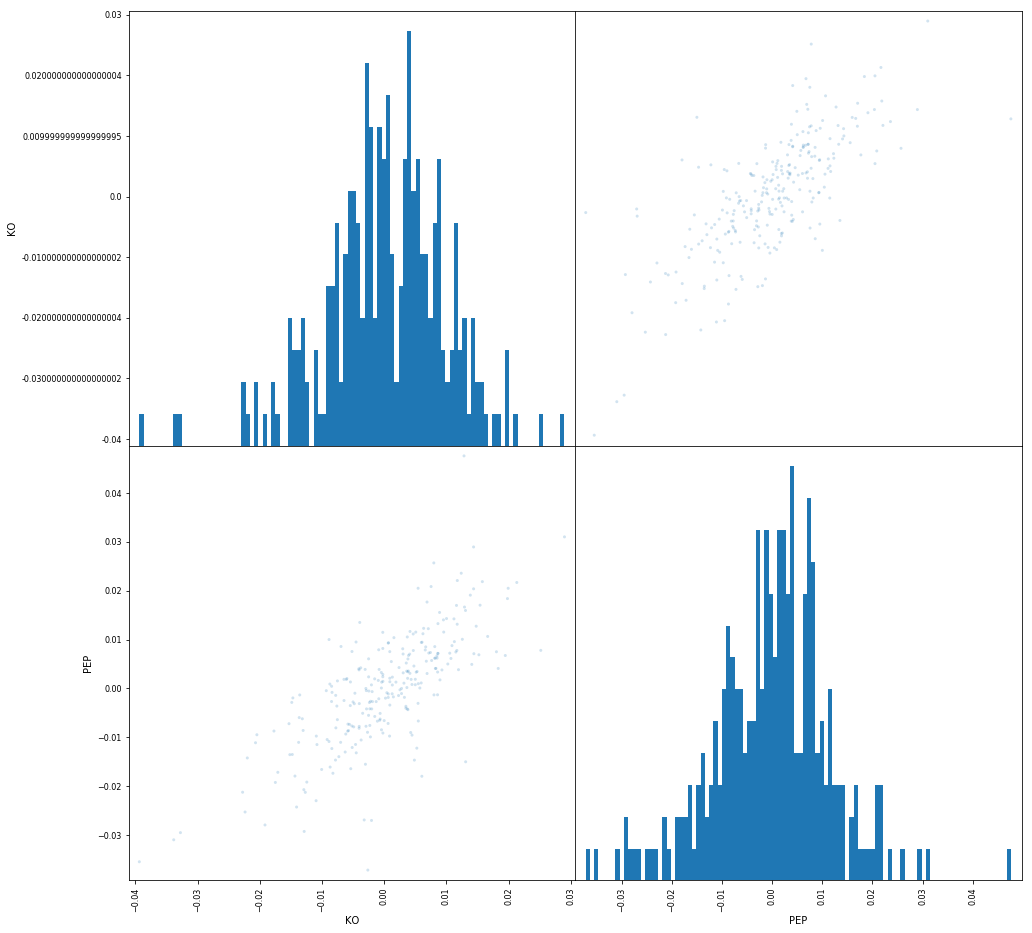

In [224]:
from pandas.plotting import scatter_matrix
scatter_matrix(dailyReturnsDF, figsize=(16,16), alpha = 0.2, hist_kwds={'bins':100})

## Cummulative returns

In [225]:
Cummulative = pd.DataFrame()

for stock in stocks:
    Cummulative[stock] = (1+dailyReturnsDF[stock]).cumprod() 



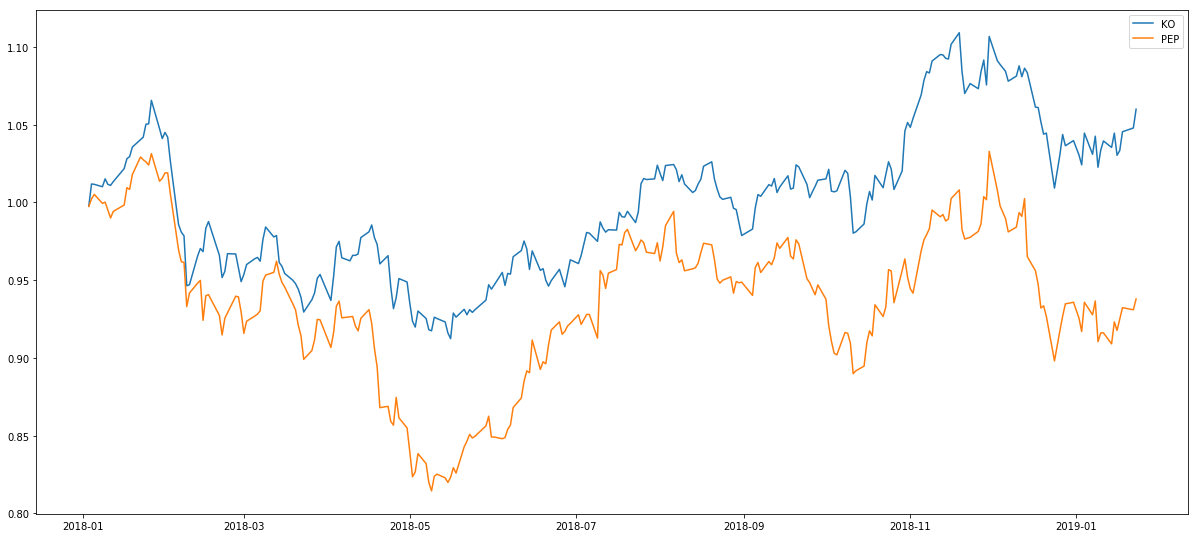

In [226]:
fig = plt.figure(figsize=(16,7))

ax = fig.add_axes([0,0,1,1])

for stock in stocks:
    ax.plot(Cummulative[stock], label =stock)


ax.legend(loc = 0 )